## Simple Linear Regression Ex 2: Salary Data

In this exercise we will repeat our analysis from the previous exercise this time using data to predict an employee's salary from their years of experience. This time we will also use the scikit-learn pacakge to perform the analysis.

First we import our required packages and dataset into the notebook.

In [1]:
import pandas as pd
import matplotlib.pyplot as plot
import statsmodels.api as stats
import numpy as np

In [3]:
salary_df = pd.read_csv('Salary_Data.csv')

### Assessing the Data

We again take a look at the dimensions of the data.

In [4]:
salary_df.shape

(30, 2)

In [5]:
salary_df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


### Visualising the Data

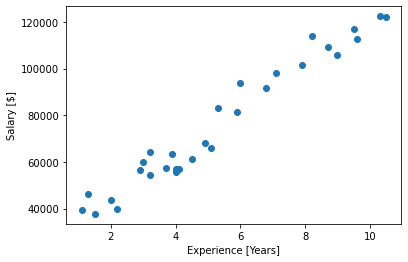

In [6]:
plot.scatter(salary_df.YearsExperience, salary_df.Salary)
plot.xlabel('Experience [Years]')
plot.ylabel('Salary [$]')
plot.show()

### Fitting the Linear Regression Model

We separate the independent variable, YearsExperience and the target variable, Salary before fitting our model.

In [8]:
Y_salary = salary_df.Salary
X_salary = stats.add_constant(salary_df.YearsExperience)

In [9]:
model_salary = stats.OLS(Y_salary, X_salary)
results_salary = model_salary.fit()

Finally we can write out our results and plot these.

In [10]:
print(results_salary.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           1.14e-20
Time:                        16:37:03   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.579e+04   2273.053     

In [11]:
intercept_salary = results_salary.params[0]
experience_coeff = results_salary.params[1]
ssr_salary = results_salary.ssr

print('The intercept value is {:.3f}'.format(intercept_salary))
print('The coefficient (slope) for the years of experience independent variable is {:.3f}'.format(experience_coeff))
print('The sum of square residuals is {:.1f}'.format(ssr_salary))

The intercept value is 25792.200
The coefficient (slope) for the years of experience independent variable is 9449.962
The sum of square residuals is 938128551.7


### Plotting Results

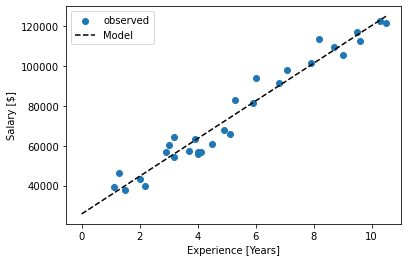

In [13]:
#Observations
plot.scatter(salary_df.YearsExperience, salary_df.Salary, label = 'observed')

#LineofBestFit
x_synthetic = np.linspace(0, salary_df.YearsExperience.max(), 50)
y_pred_salary = x_synthetic * experience_coeff + intercept_salary
plot.plot(x_synthetic, y_pred_salary, color = 'k', ls = '--', label = 'Model')
plot.xlabel('Experience [Years]')
plot.ylabel('Salary [$]')
plot.legend()
plot.show()

## Scikit-Learn 

We will now perform the same process, this time using the Scikit-learn package. At this stage we only need to import the LinearRegression class from the linear_model module within the package.

In [ ]:
from sklearn.linear_model import LinearRegression

We will reset our independent variable X and target variable Y as we don't need a constant column here as we did using statsmodels.

In [ ]:
X_salary = salary_df.YearsExperience
Y_salary = salary_df.Salary

We do need to reshape our independent variable to have a the correct format for scikit-learn however as the LinearRegression class works on 2D X arrays but here we only have a single independent variable. We do this by first converting the pandas series to a numpy array using the [series.values](https://pandas.pydata.org/docs/reference/api/pandas.Series.values.html) method before using the [ndarray.reshape](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.reshape.html#numpy.ndarray.reshape) method in the following way to reshape our array to the desired form. 

In [ ]:
X_salary.shape

(30,)

In [ ]:
X_salary = X_salary.values.reshape(-1, 1)

In [ ]:
X_salary.shape

(30, 1)

We now need to initialize an instance of the [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) class, which we name regressor. We can then simply call the .fit() method with our independent variable and target variable as arguments to fit our model. Our fully fitted model is then contained within the regressor class instance. 

In [ ]:
regressor = LinearRegression()  
regressor.fit(X_salary, Y_salary)

LinearRegression()

We can obtain our intercept and slope from the class attributes .intercept_ and .coef_. We need to manually calculate our sum of square error using the .predict() method to get our predicted Y values from our X values. We then subtract these from their observed values, square them and sum all of them using the function [np.sum](https://numpy.org/doc/stable/reference/generated/numpy.sum.html).
 

In [ ]:
sk_intercept_salary = regressor.intercept_
sk_experience_coeff = regressor.coef_[0]
sk_ssr_salary = np.sum((Y_salary-regressor.predict(X_salary))**2)

In [ ]:
print(sk_intercept_salary)
print(sk_experience_coeff)

25792.20019866871
9449.962321455074


In [ ]:
print('Using Scikit-learn...')
print('The intercept value is {:.3f}'.format(sk_intercept_salary))
print('The coefficient (slope) for the years of experience independent variable is {:.3f}'.format(sk_experience_coeff))
print('The sum of square residuals is {:.1f}'.format(sk_ssr_salary))

Using Scikit-learn...
The intercept value is 25792.200
The coefficient (slope) for the years of experience independent variable is 9449.962
The sum of square residuals is 938128551.7


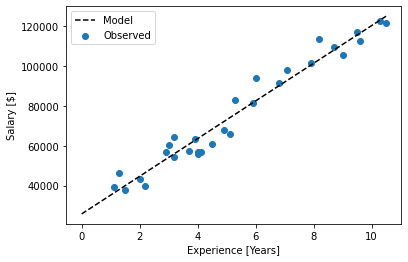

In [ ]:
x_synthetic = np.linspace(0,salary_df.YearsExperience.max(), 50)
sk_y_pred_salary = sk_experience_coeff*x_synthetic + sk_intercept_salary
plot.scatter(salary_df.YearsExperience, salary_df.Salary, label='Observed')
plot.plot(x_synthetic, sk_y_pred_salary, color='k', ls='--', label='Model')
plot.xlabel('Experience [Years]')
plot.ylabel('Salary [$]')
plot.legend()
plot.show()

These are the same results as we got using the statsmodels package which is what we would expect since linear regression simply follows the ordinary least squares algorithm we have dicussed in previous lessons.